In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/sakshi2k/Social_Network_Ads/refs/heads/master/Social_Network_Ads.csv")

In [8]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [9]:
df = df[['Age','EstimatedSalary','Purchased']]

In [10]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [12]:
X = df.drop('Purchased',axis=1)

In [13]:
y = df['Purchased']

In [14]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

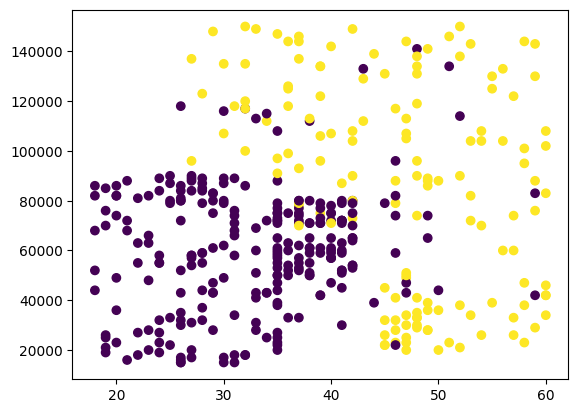

In [18]:
plt.scatter(
    x= X['Age'],
    y= X['EstimatedSalary'],
    c= y
)

In [25]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [21]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [22]:
unscaled_model = Sequential()

In [23]:
unscaled_model.add(Dense(128,input_dim = 2, activation='relu'))
unscaled_model.add(Dense(1,activation='sigmoid'))

c:\Users\adhab\OneDrive\Desktop\VsCode\DataScience\Deep Learning\deeplen\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
unscaled_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [27]:
unscaled_history = unscaled_model.fit(
    X_train,
    y_train,
    validation_data = (X_test,y_test),
    epochs=100
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4844 - loss: 91.1934 - val_accuracy: 0.3500 - val_loss: 141.5561
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4906 - loss: 86.0221 - val_accuracy: 0.3500 - val_loss: 23.7049
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5469 - loss: 19.0816 - val_accuracy: 0.3125 - val_loss: 6.4337
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5688 - loss: 12.9223 - val_accuracy: 0.6500 - val_loss: 5.2110
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5469 - loss: 42.9298 - val_accuracy: 0.6500 - val_loss: 56.1659
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4906 - loss: 36.4643 - val_accuracy: 0.6500 - val_loss: 11.0512
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5156 - loss: 50.0540 - val_accuracy: 0.3500 - val_loss: 52.0778
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5156 - loss: 59.6188 - val_acc

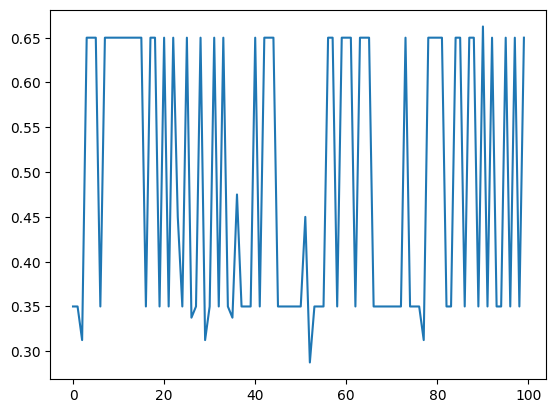

In [28]:
import matplotlib.pyplot as plt
plt.plot(unscaled_history.history['val_accuracy'])

## **Scaling**

In [29]:
scaler = StandardScaler()

In [30]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
scaled_model = Sequential()

In [32]:
scaled_model.add(Dense(128,activation='relu',input_dim = 2))
scaled_model.add(Dense(1,activation='sigmoid'))

c:\Users\adhab\OneDrive\Desktop\VsCode\DataScience\Deep Learning\deeplen\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
scaled_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [34]:
scaled_history = scaled_model.fit(X_train_scaled,y_train, validation_data= (X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6062 - loss: 0.6699 - val_accuracy: 0.8750 - val_loss: 0.6100
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7437 - loss: 0.6199 - val_accuracy: 0.9000 - val_loss: 0.5508
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7969 - loss: 0.5765 - val_accuracy: 0.9125 - val_loss: 0.4999
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8219 - loss: 0.5365 - val_accuracy: 0.9125 - val_loss: 0.4574
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8250 - loss: 0.5046 - val_accuracy: 0.9000 - val_loss: 0.4203
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8406 - loss: 0.4761 - val_accuracy: 0.9125 - val_loss: 0.3870
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8438 - loss: 0.4498 - val_accuracy: 0.9250 - val_loss: 0.3601
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8469 - loss: 0.4274 - val_accuracy: 0.9125 

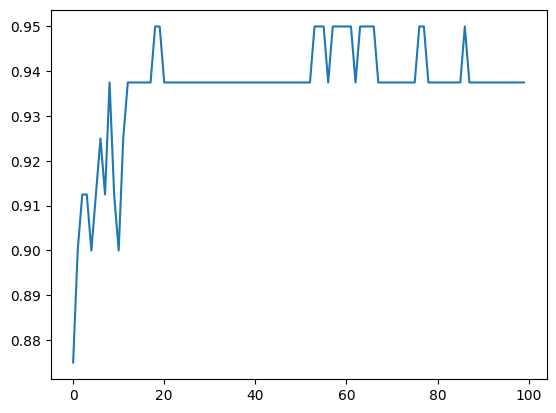

In [35]:
import matplotlib.pyplot as plt
plt.plot(scaled_history.history['val_accuracy'])